读取85-75-SN-1.xls完成
读取85-75-NS-1.xls完成
读取75-65-SN-1.xls完成
读取75-65-NS-1.xls完成
读取65-55-SN-1.xls完成
读取65-55-NS-1.xls完成
读取55-45-SN-1.xls完成
读取55-45-NS-1.xls完成
读取45-30-SN-1.xls完成
读取45-30-NS-1.xls完成
读取30-0-SN-1.xls完成
读取30-0-NS-1.xls完成
读取85-75-SN-2.xls完成
读取85-75-NS-2.xls完成
读取75-65-SN-2.xls完成
读取75-65-NS-2.xls完成
读取65-55-SN-2.xls完成
读取65-55-NS-2.xls完成
读取55-45-SN-2.xls完成
读取55-45-NS-2.xls完成
读取45-30-SN-2.xls完成
读取45-30-NS-2.xls完成
读取30-0-SN-2.xls完成
读取30-0-NS-2.xls完成
读取85-75-SN-3.xls完成
读取85-75-NS-3.xls完成
读取75-65-SN-3.xls完成
读取75-65-NS-3.xls完成
读取65-55-SN-3.xls完成
读取65-55-NS-3.xls完成
读取55-45-SN-3.xls完成
读取55-45-NS-3.xls完成
读取45-30-SN-3.xls完成
读取45-30-NS-3.xls完成
读取30-0-SN-3.xls完成
读取30-0-NS-3.xls完成
读取85-75-SN-4.xls完成
读取85-75-NS-4.xls完成
读取75-65-SN-4.xls完成
读取75-65-NS-4.xls完成
读取65-55-SN-4.xls完成
读取65-55-NS-4.xls完成
读取55-45-SN-4.xls完成
读取55-45-NS-4.xls完成
读取45-30-SN-4.xls完成
读取45-30-NS-4.xls完成
读取30-0-SN-4.xls完成
读取30-0-NS-4.xls完成
Using SN1 and NS1 data:
   coefficient
a  1454.985430
b     5.669828
c     0.249796
Using SN1 an

<ipython-input-6-619e3689fd74>:244: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-619e3689fd74>:244: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-619e3689fd74>:244: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-619e3689fd74>:244: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



   coefficient
a  1387.303857
b     5.619537
c     0.228988
Using SN3 and NS3 data:
   coefficient
a  1462.931605
b     6.245978
c     0.243750
Using SN3 and NS3 data, corrected:
   coefficient
a  1375.340010
b     5.853399
c     0.234852
Using SN4 and NS4 data:
   coefficient
a  1467.252734
b     6.129403
c     0.242652
Using SN4 and NS4 data, corrected:
   coefficient
a  1379.387854
b     5.745580
c     0.233781
请检查车速曲线和阻力曲线是否合理!如果出现异常，请检查输入文件

滑行计算结果
滑行阻力系数 A: 1465.22 B: 6.0085 C: 0.2435
修正滑行阻力系数 A: 1377.49 B: 5.6312 C: 0.2345

滑行距离和时间统计,请输入起始和终止车速


起始车速(默认是85):  85
终止车速(默认是0):  0


<ipython-input-6-619e3689fd74>:164: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df.vel < vel_0][df.vel > vel_1]['vel'].sum()/3.6
<ipython-input-6-619e3689fd74>:161: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df.vel < vel_0][df.vel > vel_1]['vel'].count()


85km/h 到 0km/h 滑行距离: 5361.561318566083, 滑行时间: 532



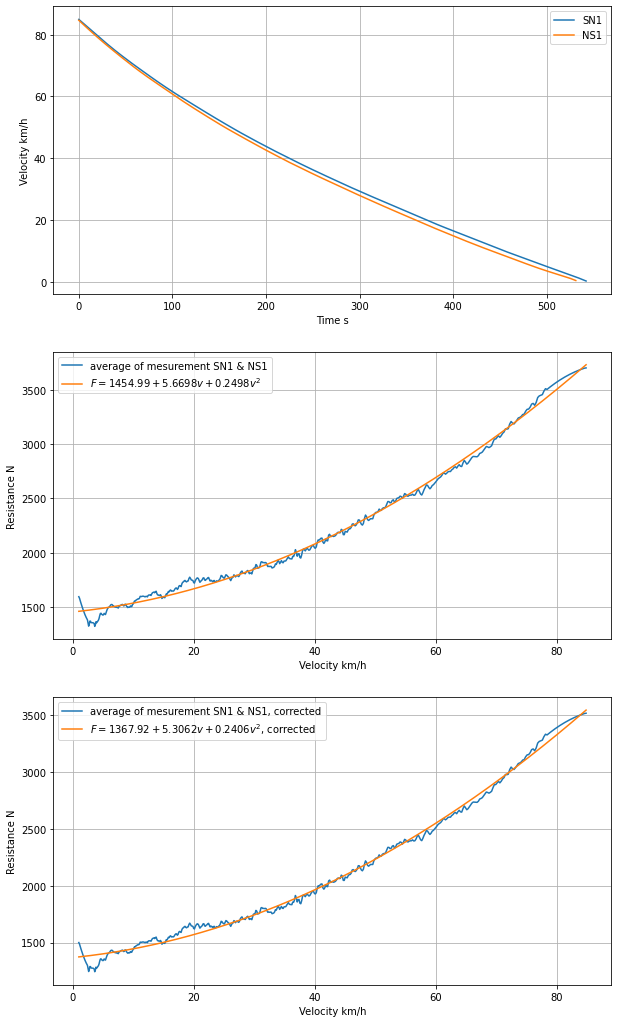

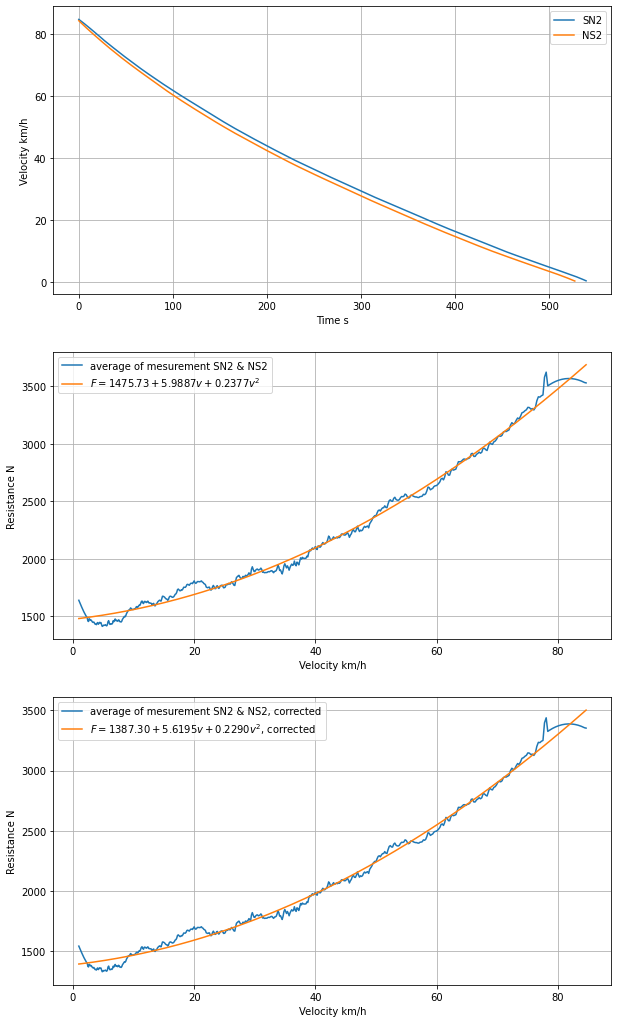

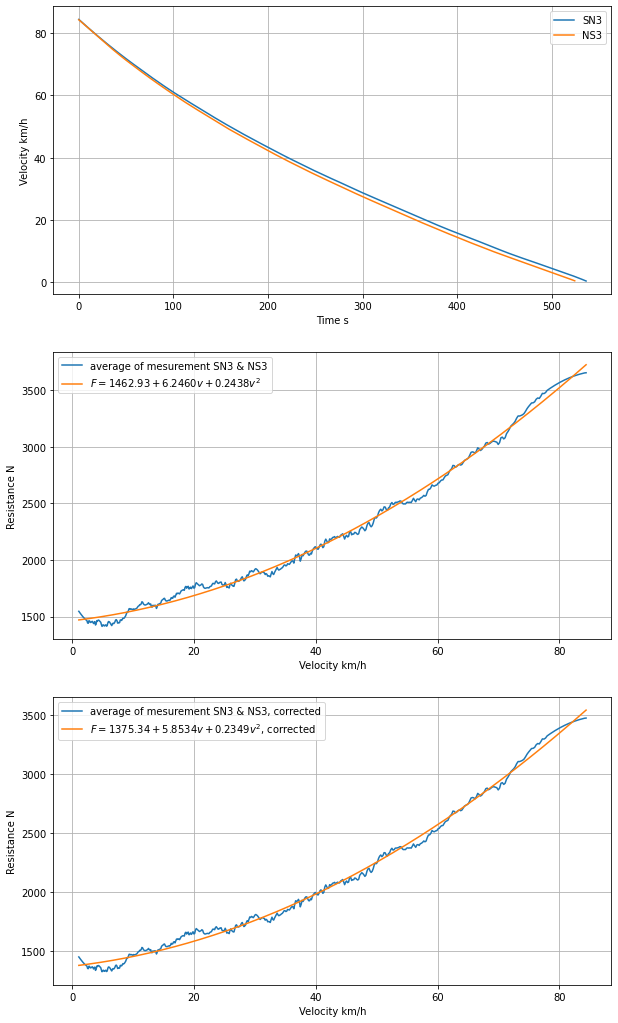

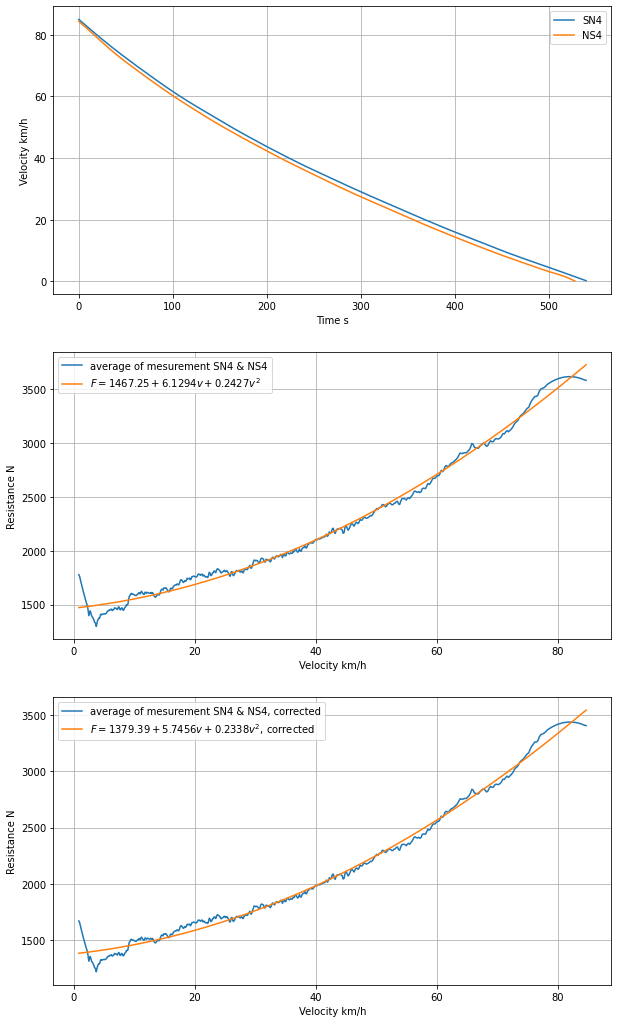

In [6]:
# Coastdown Program
# Author: Li Wei
# Version: 0.3
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
import statsmodels.formula.api as smf

info_df = pd.read_excel('输入.xlsx', sheet_name='基本信息')
fmt_df = pd.read_excel('输入.xlsx', sheet_name='数据格式')

m = info_df['试验车总质量'][0]
Mass = info_df['设计总质量'][0]
hz = int(fmt_df['采样频率'][0])
crop = int(info_df['开始车速裁剪'][0])
vel_col_names = fmt_df['车速表头'][0]
n = info_df['开始车速'].size
vel_start = info_df['开始车速']
vel_end = info_df['终止车速']

temp = info_df['大气温度'][0]
pres = info_df['大气压力'][0]
width = info_df['车宽'][0]
height = info_df['车高'][0]
################################################################################
def read_and_filter(path):
    df = pd.read_excel(path, skiprows=[0]+list(range(2,49)))
    print(f'读取{path}完成')
    return savgol_filter(df[vel_col_names], 51, 3)

def concat_and_filter(info_df):
    SN_list = []
    NS_list = []
    for i in range(n):
        SN_list.append(read_and_filter(info_df['SN'][i]))
        NS_list.append(read_and_filter(info_df['NS'][i]))

    # 数据拼接
    SN_array = np.empty(0)
    NS_array = np.empty(0)
    for i in range(n):
        SN_array = np.r_[SN_array,
            SN_list[i][(SN_list[i] < vel_start[i]) & (SN_list[i] > vel_end[i])]]
        NS_array = np.r_[NS_array,
            NS_list[i][(NS_list[i] < vel_start[i]) & (NS_list[i] > vel_end[i])]]

    # 数据裁剪、重采样、滤波
    SN_df = pd.DataFrame(SN_array[crop::hz], np.arange(SN_array[crop::hz].size), columns=['vel'])
    SN_df['vel'] = savgol_filter(SN_df.vel.dropna(), 51, 3)

    NS_df = pd.DataFrame(NS_array[crop::hz], np.arange(NS_array[crop::hz].size), columns=['vel'])
    NS_df['vel'] = savgol_filter(NS_df.vel.dropna(), 51, 3)

    return SN_df, NS_df

def K_coef(t, P, vel, M, w=2.479, h=3.419):
    t0 = 20
    d0 = 1.189
    P0 = 100
    KR = 6e-3
    g = 9.8
    f = 0.0041 + 0.0000256 * vel
    CD = 0.8
    T = t + 273.15
    T0 = 293.15
    S = w * (h - 0.3)
    M = Mass
    
    RR = M * g * f
    RW = CD * S * vel * vel / 21.15
    d = d0 * P / P0 * T0 / T
    RT = RR + RW
    K = RR / RT * (1 + KR * (t - t0)) + RW / RT * d0 / d
    return K

# 牛顿力学 `F=ma`
def resistance_calc(df):
    t = df.index.values
    vel = df.vel.values
    vel_sq = vel * vel
    acc = np.gradient(vel)/3.6
    K = K_coef(temp, pres, vel, Mass, width, height)
    F = - m * acc

    # SN1_df['acc'] = acc
    df['F'] = F
    df['F_c'] = K * F
    df['vel_sq'] = vel_sq

def avg_and_fit(SN_df, NS_df):
    # 阻力计算
    resistance_calc(SN_df)
    resistance_calc(NS_df)
    # 阻力平均 **这个地方平均好像有问题，车速没有对齐，把车速也平均了，理想的状况是车速对齐下平均阻力**
    AVG_df = SN_df.copy()
    AVG_df['F'] = (SN_df.F + NS_df.F)/2
    AVG_df['F_c'] = (SN_df.F_c + NS_df.F_c)/2
    AVG_df['vel'] = (SN_df.vel + NS_df.vel)/2
    AVG_df['vel_sq'] = (SN_df.vel_sq + NS_df.vel_sq)/2

    # 拟合法
    formula = "F ~ vel + vel_sq"
    model = smf.ols(formula, AVG_df)
    result = model.fit()

    # 拟合法
    formula_c = "F_c ~ vel + vel_sq"
    model_c = smf.ols(formula_c, AVG_df)
    result_c = model_c.fit()
    return AVG_df, result, result_c

def plot_and_output(i, sn_df, ns_df, avg_df, result, result_c):
    #查看拼接效果
    plt.figure()
    plt.plot(sn_df['vel'], label=f'SN{i+1}')
    plt.plot(ns_df['vel'], label=f'NS{i+1}')
    plt.xlabel('Time s')
    plt.ylabel('Velocity km/h')
    plt.legend()
    plt.grid()
    plt.savefig(f'vel{i+1}.png')
    #结果输出
    res = pd.DataFrame(result.params.values, index=['a', 'b', 'c'], columns=['coefficient'])
    print(f'Using SN{i+1} and NS{i+1} data:')
    print(res)
    #显示拟合结果
    a = res.iloc[0].values[0]
    b = res.iloc[1].values[0]
    c = res.iloc[2].values[0]
    avg_df['F2'] = a + b * avg_df.vel + c * avg_df.vel * avg_df.vel
    
    plt.figure()
    plt.plot(avg_df.vel, avg_df.F, label = f'average of mesurement SN{i+1} & NS{i+1}')
    plt.plot(avg_df.vel, avg_df.F2, label = f'$F={a:.2f}+{b:.4f}v+{c:.4f}v^2$')
    plt.xlabel('Velocity km/h')
    plt.ylabel('Resistance N')
    plt.legend()
    plt.grid()
    plt.savefig(f'force{i+1}.png')
    #结果输出
    res_c = pd.DataFrame(result_c.params.values, index=['a', 'b', 'c'], columns=['coefficient'])
    print(f'Using SN{i+1} and NS{i+1} data, corrected:')
    print(res_c)
    #显示拟合结果
    a = res_c.iloc[0].values[0]
    b = res_c.iloc[1].values[0]
    c = res_c.iloc[2].values[0]
    avg_df['F2_c'] = a + b * avg_df.vel + c * avg_df.vel * avg_df.vel
    
    plt.figure()
    plt.plot(avg_df.vel, avg_df.F_c, label = f'average of mesurement SN{i+1} & NS{i+1}')
    plt.plot(avg_df.vel, avg_df.F2_c, label = f'$F={a:.2f}+{b:.4f}v+{c:.4f}v^2$')
    plt.xlabel('Velocity km/h')
    plt.ylabel('Resistance N')
    plt.legend()
    plt.grid()
    plt.savefig(f'force_corrected{i+1}.png')

def delta_time(df, vel_0=85, vel_1=0):
    return df[df.vel < vel_0][df.vel > vel_1]['vel'].count()

def delta_distance(df, vel_0=85, vel_1=0):
    return df[df.vel < vel_0][df.vel > vel_1]['vel'].sum()/3.6

# main
sn_df = []
ns_df = []
avg_df = []
result = []
result_c = []
for i in range(4):
    if not pd.isnull(info_df[f'SN{i+1}'][0]):
        info_df['SN'] = info_df[f'SN{i+1}']
        info_df['NS'] = info_df[f'NS{i+1}']
        sn_df_i, ns_df_i = concat_and_filter(info_df)
        sn_df.append(sn_df_i)
        ns_df.append(ns_df_i)
        avg_df_i, result_i, result_c_i = avg_and_fit(sn_df_i, ns_df_i)
        avg_df.append(avg_df_i)
        result.append(result_i)
        result_c.append(result_c_i)
        #plot_and_output(i, sn_df, ns_df, avg_df, result, result_c)

A_coef, B_coef, C_coef = 0, 0, 0
A_coef_c, B_coef_c, C_coef_c = 0, 0, 0

for i in range(len(sn_df)):
    
    fig = plt.figure(figsize=(10, 18))
    # 1
    ax = fig.add_subplot(311)
    ax.plot(sn_df[i]['vel'], label=f'SN{i+1}')
    ax.plot(ns_df[i]['vel'], label=f'NS{i+1}')
    ax.set_xlabel('Time s')
    ax.set_ylabel('Velocity km/h')
    ax.legend()
    ax.grid()

    # 2
    ax = fig.add_subplot(312)
    #结果输出
    res = pd.DataFrame(result[i].params.values, index=['a', 'b', 'c'], columns=['coefficient'])
    print(f'Using SN{i+1} and NS{i+1} data:')
    print(res)
    #显示拟合结果
    a = res.iloc[0].values[0]
    b = res.iloc[1].values[0]
    c = res.iloc[2].values[0]
    A_coef += a
    B_coef += b
    C_coef += c
    avg_df[i]['F2'] = a + b * avg_df[i].vel + c * avg_df[i].vel * avg_df[i].vel
    
    ax.plot(avg_df[i].vel, avg_df[i].F, label = f'average of mesurement SN{i+1} & NS{i+1}')
    ax.plot(avg_df[i].vel, avg_df[i].F2, label = f'$F={a:.2f}+{b:.4f}v+{c:.4f}v^2$')
    ax.set_xlabel('Velocity km/h')
    ax.set_ylabel('Resistance N')
    ax.legend()
    ax.grid()

    # 3
    ax = fig.add_subplot(313)
    #结果输出
    res_c = pd.DataFrame(result_c[i].params.values, index=['a', 'b', 'c'], columns=['coefficient'])
    print(f'Using SN{i+1} and NS{i+1} data, corrected:')
    print(res_c)
    #显示拟合结果
    a = res_c.iloc[0].values[0]
    b = res_c.iloc[1].values[0]
    c = res_c.iloc[2].values[0]
    A_coef_c += a
    B_coef_c += b
    C_coef_c += c
    avg_df[i]['F2_c'] = a + b * avg_df[i].vel + c * avg_df[i].vel * avg_df[i].vel
    
    ax.plot(avg_df[i].vel, avg_df[i].F_c, label = f'average of mesurement SN{i+1} & NS{i+1}, corrected')
    ax.plot(avg_df[i].vel, avg_df[i].F2_c, label = f'$F={a:.2f}+{b:.4f}v+{c:.4f}v^2$, corrected')
    ax.set_xlabel('Velocity km/h')
    ax.set_ylabel('Resistance N')
    ax.legend()
    ax.grid()
    
    fig.show()

print('请检查车速曲线和阻力曲线是否合理!如果出现异常，请检查输入文件')

A_coef, B_coef, C_coef = A_coef/len(sn_df), B_coef/len(sn_df), C_coef/len(sn_df)
A_coef_c, B_coef_c, C_coef_c = A_coef_c/len(sn_df), B_coef_c/len(sn_df), C_coef_c/len(sn_df)

print('\n滑行计算结果')
print(f'滑行阻力系数 A: {A_coef:.2f} B: {B_coef:.4f} C: {C_coef:.4f}')
print(f'修正滑行阻力系数 A: {A_coef_c:.2f} B: {B_coef_c:.4f} C: {C_coef_c:.4f}')
print('\n滑行距离和时间统计,请输入起始和终止车速')
try :
    vel_0 = int(input('起始车速(默认是85): '))
    vel_1 = int(input('终止车速(默认是0): '))
except:
    print(f'{85}km/h 到 {0}km/h 滑行距离: {delta_distance(avg_df[0])}, 滑行时间: {delta_time(avg_df[0])}\n')
else:
    print(f'{vel_0}km/h 到 {vel_1}km/h 滑行距离: {delta_distance(avg_df[0], vel_0, vel_1)}, 滑行时间: {delta_time(avg_df[0], vel_0, vel_1)}\n')